<a href="https://colab.research.google.com/github/Murega14/health_insurance_premium_prediction/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Insurance Premium Prediction

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [ ]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


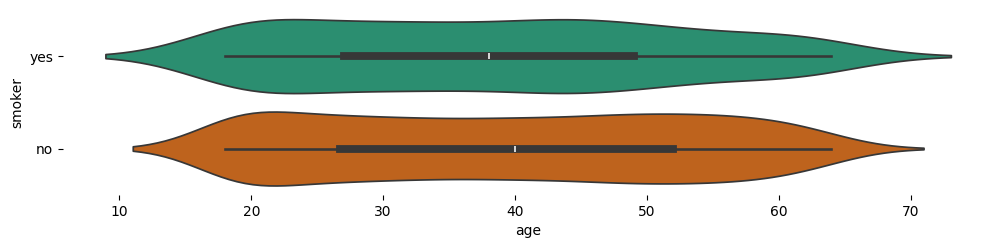

In [ ]:
# @title smoker vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='smoker', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Understanding the Data

In [ ]:
#checking the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#getting summary statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [ ]:
#checking if there are any missing values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
def check_duplicates(df):
    """
    Function to check for duplicates in all columns of a dataframe
    Duplicates are dropped for each cplumn if they exist
    if no duplicates exist, the function returns the original dataframe
    :param df: dataframe
    :return: dataframe without duplicates
    """
    duplicates_found = False
    for column in df.columns:
        if df[column].duplicated().any():
            df = df.drop_duplicates(subset=column, inplace=True)
            duplicates_found = True

    if duplicates_found:
        return df
    else:
        return False


In [ ]:
#checking for duplicate values and removing them if they exist
#result = check_duplicates(df)

## Exploratory Analysis

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
#creating a function to plot distribution plots

def plot_distribution(df, column, figure_size=(12, 8), title=None, xlabel=None, annotate=False):
    """
    Plots the distribution of a column in a dataframe.
    Args:
        df (pandas.DataFrame): The dataframe to plot the distribution of the column.
        column (str): The name of the column to plot the distribution of.
        figure_size (tuple): Size of the figure (width, height).
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        annotate (bool): Whether to annotate the plot.
    Returns:
        None.
    Raises:
        None.
    """
    plt.figure(figsize=figure_size)
    ax = sns.displot(df[column].sort_values(ascending=False))
    ax.set_titles(title if title else f'Distribution of {column}')

    if annotate:
        for bars in ax.axes.flat[0].patches:
            ax.axes.flat[0].text(bars.get_x() + bars.get_width() / 2, bars.get_height(), bars.get_height(), ha='center', va='bottom')

    plt.xlabel(xlabel if xlabel else column)
    plt.grid(False)
    plt.show()

    plt.show()


<Figure size 1200x800 with 0 Axes>

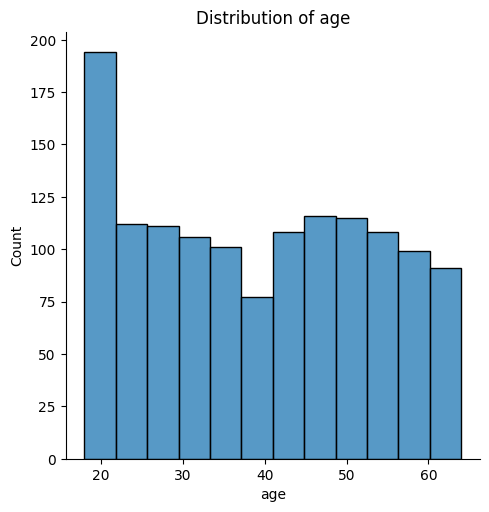

In [ ]:
#visualizing the age distribution of the planet
plot_distribution(df, 'age')

The dataset majorly consists of 20 year olds while 38-40 year olds constitute the lowest population in the dataset

<Figure size 1200x800 with 0 Axes>

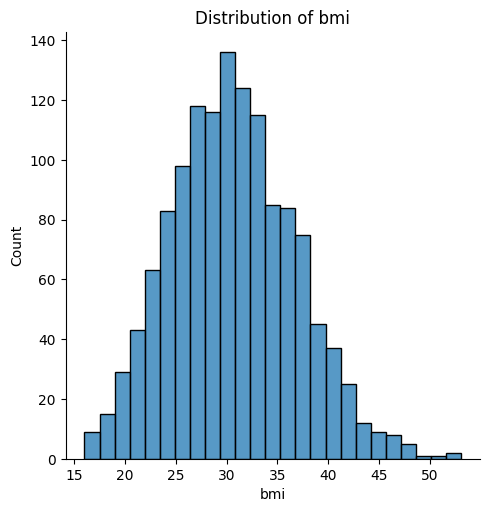

In [ ]:
plot_distribution(df, 'bmi')

<Figure size 1200x800 with 0 Axes>

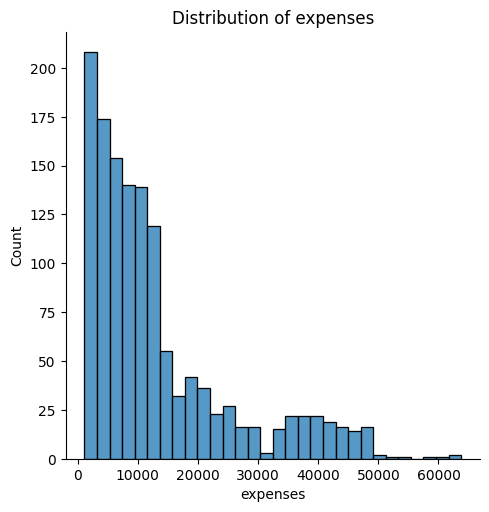

In [ ]:
plot_distribution(df, 'expenses')

Text(0.5, 1.0, 'No. of children vs Expenses')

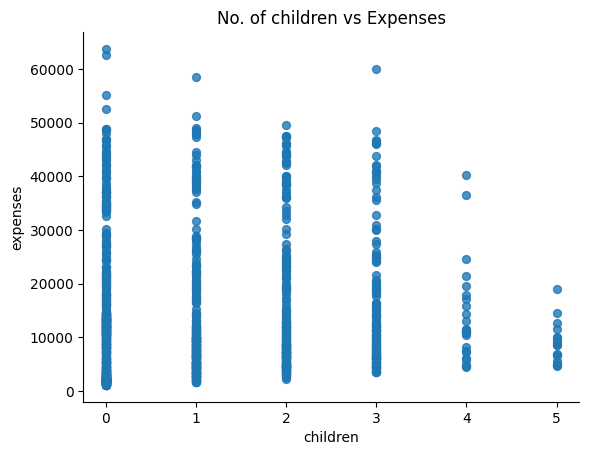

In [ ]:
#visualizing the relationsgip between the no. of children and expenses incurred

df.plot(kind='scatter', x='children', y='expenses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("No. of children vs Expenses")

<Figure size 1200x800 with 0 Axes>

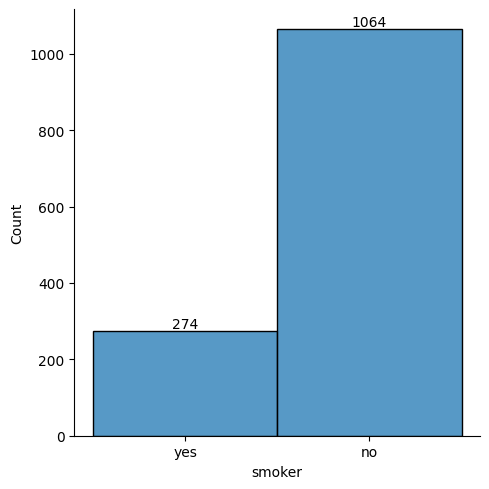

In [ ]:
plot_distribution(df, 'smoker', annotate=True)


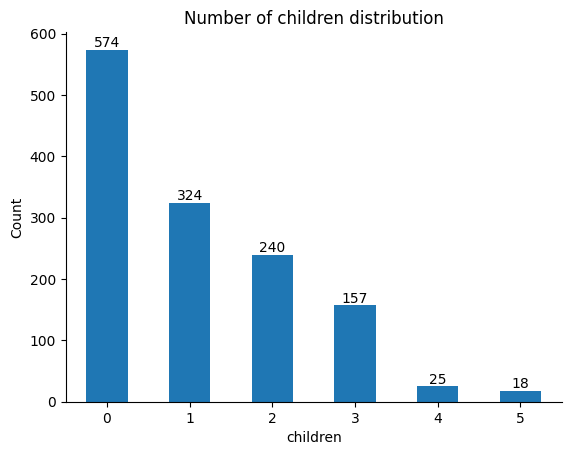

In [ ]:
#visualizing the distribution of children

#grouping the dataset by the children column
children = df.groupby('children').size()

#plotting the data
ax = children.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Number of children distribution")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotating the plot
for bars in ax.patches:
    ax.text(bars.get_x() + bars.get_width()/2, bars.get_height(), bars.get_height(), ha='center', va='bottom')

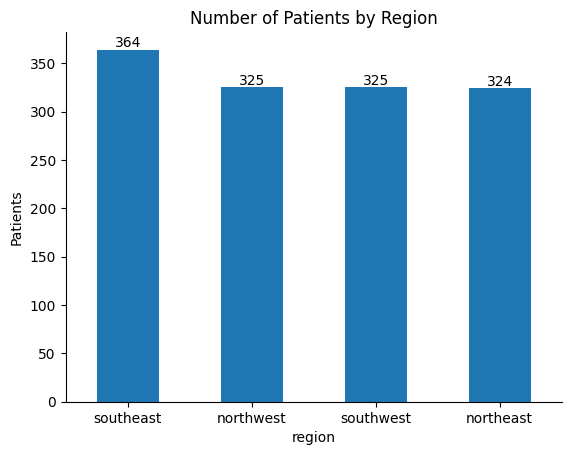

In [ ]:
#visualizing the number of customers in the dataset by region

#grouping the dataset by region
region = df.groupby('region').size().sort_values(ascending=False)

#plotting the data
ax = region.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Patients")
plt.title("Number of Patients by Region")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotating the plot
for bars in ax.patches:
  ax.text(bars.get_x() + bars.get_width()/2, bars.get_height(), bars.get_height(), ha='center', va='bottom')

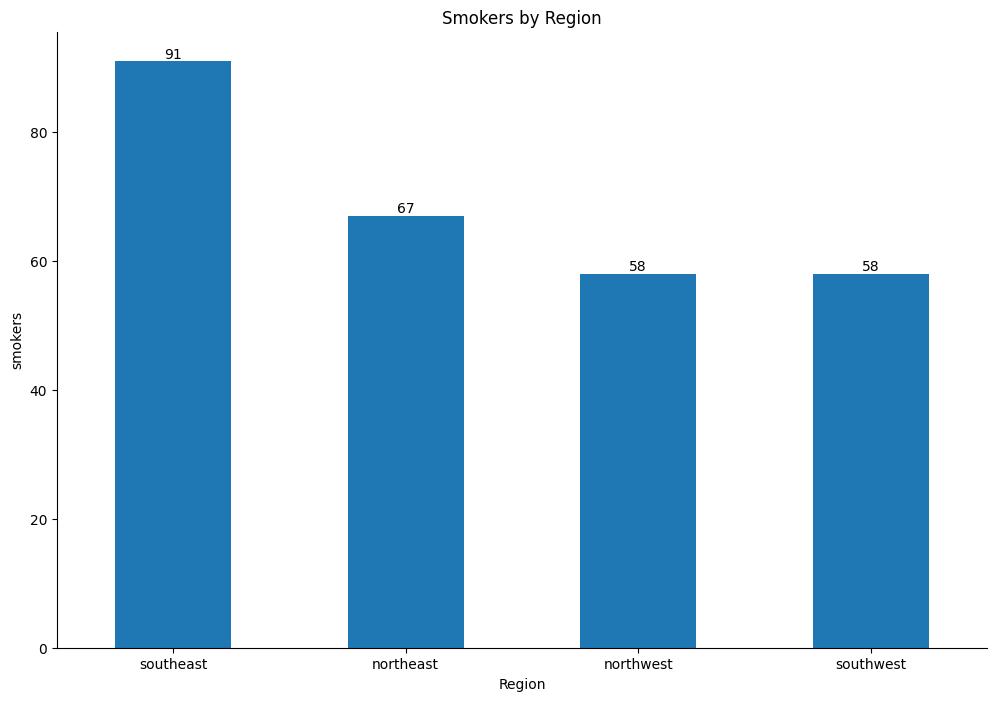

In [ ]:
#visualizing smokers by region

#setting the figure size
plt.figure(figsize=(12,8))

#sorting the values in descending order
smokers = df[df['smoker'] == 'yes'].groupby('region').size().sort_values(ascending=False)

#plotting the data
ax = smokers.plot(kind='bar')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Region')
plt.ylabel("smokers")
plt.title('Smokers by Region')
plt.xticks(rotation=0)


for bars in ax.patches:
    ax.text(bars.get_x() + bars.get_width()/2, bars.get_height(), bars.get_height(), ha='center', va='bottom')
plt.show()

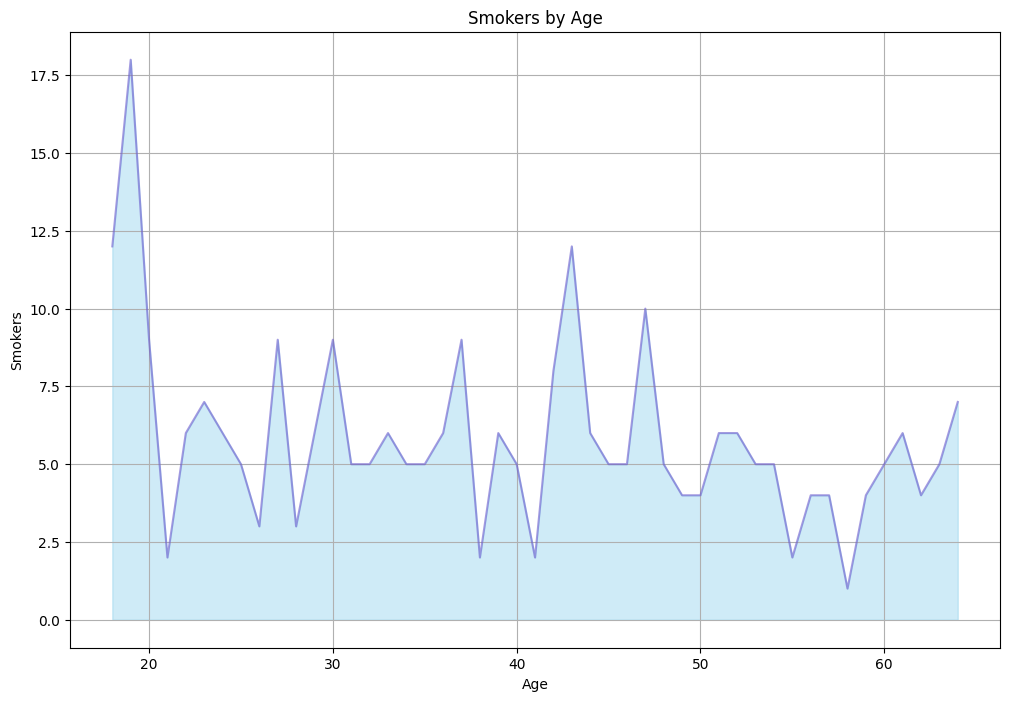

In [ ]:
#visualizing the relationship between smokers and age

#filtering the dataframe for smokers only
smokers_df = df[df['smoker'] == 'yes']

#grouping the data by age and calculating the no. of Smokers
smokers_by_age = smokers_df.groupby('age').size()

#plotting an area chart
plt.figure(figsize=(12, 8))
plt.fill_between(smokers_by_age.index, smokers_by_age, alpha=0.4, color='skyblue')
plt.plot(smokers_by_age.index, smokers_by_age, alpha=0.6, color='Slateblue')
plt.xlabel('Age')
plt.ylabel('Smokers')
plt.title("Smokers by Age")
plt.grid(True)


## Prediction

In [ ]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#extracting dependent and independent variables
X = df.drop(columns=['expenses'])
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [ ]:
y = df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [ ]:
#splitting the data for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#encoding the data to transform categorical data
X_train = pd.get_dummies(X_train, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
# getting dummies for categorical columns
X_test = pd.get_dummies(X_test, columns=['sex', 'smoker', 'region'], drop_first=True)

# converting boolean columns to numeric (0 or 1)
X_test['sex_male'] = X_test['sex_male'].astype(int)
X_test['smoker_yes'] = X_test['smoker_yes'].astype(int)
X_test['region_southwest'] = X_test['region_southwest'].astype(int)
X_test['region_northwest'] = X_test['region_northwest'].astype(int)
X_test['region_southeast'] = X_test['region_southeast'].astype(int)

X_test


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,52,30.2,1,1,0,0,0,1
610,47,29.4,1,0,0,0,1,0
569,48,40.6,2,1,1,1,0,0
1034,61,38.4,0,1,0,1,0,0
198,51,18.1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1261,28,37.1,1,1,0,0,0,1
494,21,25.7,4,1,1,0,0,1
97,55,38.3,0,1,0,0,1,0
418,64,39.2,1,1,0,0,1,0


In [ ]:
y_test

578      9724.53
610      8547.69
569     45702.02
1034    12950.07
198      9644.25
          ...   
1261     3277.16
494     17942.11
97      10226.28
418     14418.28
920     13451.12
Name: expenses, Length: 402, dtype: float64

### Linear Regression

In [ ]:
#building the model
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_pred = linear_regression_model.predict(X_test)
y_test_pred

array([ 1.12527735e+04,  9.55340741e+03,  3.78609294e+04,  1.60753296e+04,
        6.75007983e+03,  4.01175805e+03,  1.60053500e+03,  1.43069842e+04,
        8.89417653e+03,  7.35353618e+03,  4.67327604e+03,  1.01564139e+04,
        8.89221569e+03,  3.78021282e+03,  2.74720732e+04,  1.08659987e+04,
        1.10895829e+04,  6.15657505e+03,  8.07167069e+03,  2.69765177e+04,
        3.33305898e+04,  1.42439813e+04,  1.18611409e+04,  3.19788505e+04,
        4.09852510e+03,  9.30498199e+03,  1.14583413e+03,  9.91195884e+03,
        3.73698721e+03,  1.02689885e+04,  8.90386069e+03,  3.99419449e+04,
        1.57588468e+04,  1.39304849e+04,  2.46285948e+04,  5.21403321e+03,
        1.26738987e+04,  3.06137190e+04,  3.32411662e+04,  3.66241766e+03,
        4.06913511e+03,  3.91440027e+03,  3.04058911e+04,  3.92174666e+04,
        2.75954372e+04,  4.90092303e+03,  1.07318329e+04,  7.61809909e+03,
        3.67448641e+03,  1.03061986e+04,  5.76711394e+03,  3.25106772e+03,
        3.29242961e+04,  

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # square root of MSE
r2 = r2_score(y_test, y_test_pred)

# Print the regression metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 4011.3808850910846
Mean Squared Error (MSE): 33335740.30010033
Root Mean Squared Error (RMSE): 5773.711137570041
R-squared (R2): 0.7909584752654695


In [ ]:
#performing cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_regression_model, X_test, y_test, cv=5, scoring='r2')

print(f'Cross-Validation Scores: {scores}')
print(f'Mean R-Squared: {scores.mean()}')

Cross-Validation Scores: [0.76475838 0.83735088 0.68369074 0.78025753 0.78530502]
Mean R-Squared: 0.7702725112552951


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#initializing the random forest regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=1, random_state=50)

#training the model
random_forest_reg.fit(X_train, y_train)

#making predictions
y_pred = random_forest_reg.predict(X_test)

#evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 21730726.36560287
R2 Score: 0.8637311146487179


In [ ]:
#performing cross-validation
from sympy.abc import y
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest_reg, X_test, y_test, cv=10, scoring="r2")
print(f'Cross-Validation Scores: {scores}')
print(f'Mean R-squared: {scores.mean()}')

Cross-Validation Scores: [0.89934805 0.90466783 0.94289499 0.84868122 0.82101156 0.75144242
 0.89608902 0.78485486 0.95262308 0.83932778]
Mean R-squared: 0.8640940799713415


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(gb_regressor, X_test, y_test, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {mean_cv_score}")

Mean Squared Error: 18216017.19504906
Mean Absolute Error: 2579.295745993896
R-squared: 0.8857711280816518
Cross-validation scores: [0.88939903 0.92086764 0.80120726 0.87474614 0.86925988]
Average cross-validation score: 0.8710959898382477


In [ ]:
#predicting expenses using the gradient boosting regressor
df['predicted_pay'] = gb_regressor.predict(df)
df

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- expenses
- region
- sex
- smoker
Feature names seen at fit time, yet now missing:
- region_northwest
- region_southeast
- region_southwest
- sex_male
- smoker_yes
